## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
from spacy import displacy
import en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
nlp = en_core_web_sm.load()

## Helper Functions

In [5]:
contractions_dict = { "ain't": "are not","aren't": "are not",
                        "can't": "cannot","can't've": "cannot have",
                        "'cause": "because","could've": "could have","couldn't": "could not",
                        "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                        "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                        "hasn't": "has not","haven't": "have not","he'd": "he would",
                        "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                        "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                        "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                        "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                        "it'd": "it would","it'd've": "it would have","it'll": "it will",
                        "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                        "mayn't": "may not","might've": "might have","mightn't": "might not", 
                        "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                        "mustn't've": "must not have", "needn't": "need not",
                        "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                        "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                        "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                        "she'll": "she will", "she'll've": "she will have","should've": "should have",
                        "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                        "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                        "there'd've": "there would have", "they'd": "they would",
                        "they'd've": "they would have","they'll": "they will",
                        "they'll've": "they will have", "they're": "they are","they've": "they have",
                        "to've": "to have","wasn't": "was not","we'd": "we would",
                        "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                        "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                        "what'll've": "what will have","what're": "what are", "what've": "what have",
                        "when've": "when have","where'd": "where did", "where've": "where have",
                        "who'll": "who will","who'll've": "who will have","who've": "who have",
                        "why've": "why have","will've": "will have","won't": "will not",
                        "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                        "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                        "y'all'd've": "you all would have","y'all're": "you all are",
                        "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                        "you'll": "you will","you'll've": "you will have", "you're": "you are",
                        "you've": "you have"
                        }


# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions=contractions_dict):
  def replace(match):
    # print(contractions_dict[match.group(0)])
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

def remove_digits(text):
  return re.sub('\w*\d\w*', "", text)

def remove_punctutation(text):
  return re.sub("[%s]" % re.escape(string.punctuation), "", text)

def replace(match):
    # print(contractions_dict[match.group(0)])
    return contractions_dict[match.group(0)]

def text_prep(column, reverse=True, frequency=False, word_number=20, pos=False):
    stopword = set(stopwords.words('english'))
    stopword

    contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
    word_list = []

    for text in column:
        
        # expand contractions
        text = contractions_re.sub(replace, text)

        # remove digits from text
        text = re.sub('\w*\d\w*', "", text)

        # remove punctuation
        text = re.sub("[%s]" % re.escape(string.punctuation), "", text)

        # remove links
        text = re.sub("(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)", "", text)

        words = text.split(" ")

        for word in words:
            if word.lower() not in stopword:
                word_list.extend(word.split(" "))

    prep_words = Counter(word_list)
    sorted_words = sorted(prep_words.items(), key=lambda x: x[1], reverse=reverse)


    if frequency:
        return sorted_words
    
    freq_words = []
    for i in range(word_number):
        if sorted_words[i][0] != "":
            freq_words.append(sorted_words[i][0])


    tags = []
    if pos:
        word_tags = nltk.pos_tag(word_list)

        for tag in word_tags:
            tags.append(tag[1])

        tags = Counter(tags)
        sorted_tags = sorted(tags.items(), key=lambda x: x[1], reverse=reverse)
        
        top_tags = []
        for i in range(word_number):
            top_tags.append(sorted_tags[i][0])
        return top_tags

        

    return freq_words


def post_length(column, data=data, output='max'):
    length =[]
    for text in column:
        length.append(len(text))

        # print(f"{len(text)} - {text}")

    length = np.array(length)

    if output == 'max':

        max_str = data[data[column].str.len() == data[column].str.len().max()][[column]].reset_index(drop=True).drop_duplicates()
        max_str["length"] = max_str[column].str.len()

        return max_str

    elif output == 'min':
        min_str = data[data[column].str.len() == data[column].str.len().min()][[column]].reset_index(drop=True).drop_duplicates()
        min_str["length"] = min_str[column].str.len()

        return min_str

## Reading Data-in

In [7]:
data = pd.read_csv("./fico_forum_all_data.csv")
data.head()

,post_id,post_date,post_title,post_author,post_text,post_author_rank,reply_date,replier,votes,replier_rank,reply_text
0,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-28,pizzadude,2.0,Moderator,This link has some good information: https:/...
1,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,MarkintheHV,1.0,Regular Contributor,I have been looking at these as well. I have ...
2,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,Anonymalous,3.0,Established Contributor,"Now's the time, if you want to do it. The new ..."
3,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,M_Smart007,2.0,Legendary Contributor,"I bought in May, and went awayWill probably ca..."
4,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,M_Smart007,2.0,Legendary Contributor,"@Anonymalous, In reading your forum post(s) ....."


In [8]:
data.shape

(12461, 11)

#### Columns and Representation

* post_id - 
* post_date - Date on which the question was posted on the forum
* post_title - Title of the post asking the quetsion
* post_author - username of the question asker
* post_text - The text explaining the question
* reply_date - date on which the reply was posted
* repiler - Username for replier
* reply_text - text containing the answer to the posts
* replier_posts_counts - total number of posts made by the replier


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12461 entries, 0 to 12460
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           12461 non-null  int64  
 1   post_date         12461 non-null  object 
 2   post_title        12461 non-null  object 
 3   post_author       12427 non-null  object 
 4   post_text         12454 non-null  object 
 5   post_author_rank  12461 non-null  object 
 6   reply_date        12461 non-null  object 
 7   replier           12362 non-null  object 
 8   votes             12456 non-null  float64
 9   replier_rank      12461 non-null  object 
 10  reply_text        12237 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.0+ MB


### Missing or Null values

In [10]:
data.isnull().sum()

post_id               0
post_date             0
post_title            0
post_author          34
post_text             7
post_author_rank      0
reply_date            0
replier              99
votes                 5
replier_rank          0
reply_text          224
dtype: int64

### Check duplicated

In [11]:
data.duplicated().sum()

26

In [12]:
data.dropna(inplace=True)
data.duplicated().sum()

18

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12089 entries, 0 to 12460
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           12089 non-null  int64  
 1   post_date         12089 non-null  object 
 2   post_title        12089 non-null  object 
 3   post_author       12089 non-null  object 
 4   post_text         12089 non-null  object 
 5   post_author_rank  12089 non-null  object 
 6   reply_date        12089 non-null  object 
 7   replier           12089 non-null  object 
 8   votes             12089 non-null  float64
 9   replier_rank      12089 non-null  object 
 10  reply_text        12089 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.1+ MB


In [15]:
data.head()

,post_id,post_date,post_title,post_author,post_text,post_author_rank,reply_date,replier,votes,replier_rank,reply_text
0,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-28,pizzadude,2.0,Moderator,This link has some good information: https:/...
1,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,MarkintheHV,1.0,Regular Contributor,I have been looking at these as well. I have ...
2,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,Anonymalous,3.0,Established Contributor,"Now's the time, if you want to do it. The new ..."
3,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,M_Smart007,2.0,Legendary Contributor,"I bought in May, and went awayWill probably ca..."
4,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near 10% and the stock marke...,Established Contributor,2022-09-29,M_Smart007,2.0,Legendary Contributor,"@Anonymalous, In reading your forum post(s) ....."


In [16]:
data.groupby("post_title").count()[['post_id']].sort_values(
  by="post_id", ascending=False)

,post_id
post_title,
Garden Club - January 2022,989
Garden Club - April 2022,959
Garden Club - March 2022,893
Garden Club - February 2022,739
Garden Club - September 2022,700
...,...
Secured Loans,1
Discover $200 Savings Bonus,1
Using Privacy For Auto Pays,1


In [17]:
data["post_text"] = data['post_text'].apply(lambda x: expand_contractions(x))
data["post_title"] = data['post_title'].apply(lambda x: expand_contractions(x))
data["reply_text"] = data['post_text'].apply(lambda x: expand_contractions(x))

In [18]:
data['post_text'] = data['post_text'].str.lower()
data['post_title'] = data['post_title'].str.lower()
data['reply_text'] = data['reply_text'].str.lower()

In [19]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [20]:
data['post_author'].unique()

array(['mfinsmi1', 'Dave4fun', 'DSTforlife', 'DotaK', 'Janneman',
       'Jnbmom', 'Rebuilder2021', 'James3', 'MichleBery',
       'dangerously_caffeinated', 'mowglidude', 'CreditMarathoner',
       'clipperskipper', 'sihmud', 'akaFettHutt', 'Milano', 'Azza',
       'hzynneb', 'HeavyResist', 'kremonis', 'LP007', 'Veronik2019',
       'TeenWolf', 'financialfreedom777', 'youdontkillmoney', 'NoMoreE46',
       'KLEXH25', 'acercode', 'xenon3030', 'acreditdummy123',
       'jazzyvar84', 'EAJuggalo', 'jetsfan2013', 'AlanGJP', 'folks19',
       'SouthJamaica', 'W261w261', 'SoCalGardener', 'CaptinVantage',
       '2b2rich', 'FettHutt', 'TyrannicalDuncery', 'Citylights18',
       'DogwoodLynx', 'tebtengri', 'lns1976', 'MCM1', 'tcbofade',
       'M_Smart007', 'UncleB', 'longtimelurker', 'Roadgeek395',
       'redE2move', 'Mdowning30', 'rgd51', 'user979797', 'TG10X',
       'svali42', 'soxfaininfl', 'WannabDebtFree1', 'pauldc73',
       'Househunter121', 'Cookiegrabber', 'OzonMike', 'Suzette2',
 

In [21]:
data['replier'].unique()

array(['pizzadude', 'MarkintheHV', 'Anonymalous', 'M_Smart007',
       'GatorGuy', 'babygirl1256', 'SouthJamaica', 'TheFIGuy',
       'DSTforlife', 'AverageJoesCredit', 'Dave4fun', 'Aim_High',
       'ladybug2016', 'everest', 'MySunset271', 'FinStar',
       'CreditInspired', 'mau471', 'TryItAgain', 'lns1976',
       'Citylights18', 'Junejer', 'DotaK', 'sznthescore',
       'CreditCuriosity', 'Janneman', 'CH-7-Mission-Accomplished',
       'pinkandgrey', 'Jnbmom', 'ghgirll40', 'Dinosaur', 'longtimelurker',
       'DaveInAZ', 'AirForceOne', 'Rebuilder2021', 'creditfan', 'Kforce',
       'James3', 'pauldc73', 'MichleBery', 'Cookiegrabber',
       'Who_wuda_thought', 'Mdowning30', 'disdreamin', 'tacpoly',
       'learningcredit54', 'dangerously_caffeinated', 'sportsguy83',
       'Ladyofthelake', 'mrpuffrabbit', 'shmacckk', 'brk1971',
       'mowglidude', 'AlmostNJ', 'EAJuggalo', 'TheRedHat',
       'SweetCreditObsession', 'ThomasJNewton', 'CreditMarathoner',
       'californiaboy935', 'P

In [22]:
data["post_text"] = data['post_text'].apply(lambda x: remove_digits(x))
data["post_title"] = data['post_title'].apply(lambda x: remove_digits(x))
data["reply_text"] = data['post_text'].apply(lambda x: remove_digits(x))

In [23]:
data["post_text"] = data['post_text'].apply(lambda x: remove_punctutation(x))
data["post_title"] = data['post_title'].apply(lambda x: remove_punctutation(x))
data["reply_text"] = data['post_text'].apply(lambda x: remove_punctutation(x))

In [24]:
data.head()

,post_id,post_date,post_title,post_author,post_text,post_author_rank,reply_date,replier,votes,replier_rank,reply_text
0,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near and the stock market d...,Established Contributor,2022-09-28,pizzadude,2.0,Moderator,with ibonds being near and the stock market d...
1,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near and the stock market d...,Established Contributor,2022-09-29,MarkintheHV,1.0,Regular Contributor,with ibonds being near and the stock market d...
2,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near and the stock market d...,Established Contributor,2022-09-29,Anonymalous,3.0,Established Contributor,with ibonds being near and the stock market d...
3,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near and the stock market d...,Established Contributor,2022-09-29,M_Smart007,2.0,Legendary Contributor,with ibonds being near and the stock market d...
6,6597183,2022-09-29,ibonds,mfinsmi1,with ibonds being near and the stock market d...,Established Contributor,2022-09-29,M_Smart007,1.0,Legendary Contributor,with ibonds being near and the stock market d...


In [25]:
df = data.copy()

In [26]:
df.drop(['post_id', 'post_date', "post_author", "reply_date", "replier"], axis=1, inplace=True)

In [27]:
df

,post_title,post_text,post_author_rank,votes,replier_rank,reply_text
0,ibonds,with ibonds being near and the stock market d...,Established Contributor,2.0,Moderator,with ibonds being near and the stock market d...
1,ibonds,with ibonds being near and the stock market d...,Established Contributor,1.0,Regular Contributor,with ibonds being near and the stock market d...
2,ibonds,with ibonds being near and the stock market d...,Established Contributor,3.0,Established Contributor,with ibonds being near and the stock market d...
3,ibonds,with ibonds being near and the stock market d...,Established Contributor,2.0,Legendary Contributor,with ibonds being near and the stock market d...
6,ibonds,with ibonds being near and the stock market d...,Established Contributor,1.0,Legendary Contributor,with ibonds being near and the stock market d...
...,...,...,...,...,...,...
12452,ploc banking strategy w ibonds,is there a way to maximize cash flow with a pl...,Valued Contributor,0.0,Established Contributor,is there a way to maximize cash flow with a pl...
12457,ploc banking strategy w ibonds,is there a way to maximize cash flow with a pl...,Valued Contributor,1.0,Valued Contributor,is there a way to maximize cash flow with a pl...
12458,ploc banking strategy w ibonds,is there a way to maximize cash flow with a pl...,Valued Contributor,0.0,Valued Contributor,is there a way to maximize cash flow with a pl...
12459,free telehealth for macus mystyle checking a,macu is spread out around the utah area but an...,Regular Contributor,1.0,Established Member,macu is spread out around the utah area but an...


### Lemmatization

In [28]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [29]:
from nltk.stem import WordNetLemmatizer

In [30]:
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("splendid"))

splendid


In [31]:
def lemmatize_text(text):

  lemmatizer = WordNetLemmatizer()

  words = text.split(" ")
  lem_words = []

  for word in words:
    lem_words.append(lemmatizer.lemmatize(word))

  return " ".join(lem_words)

In [32]:
lemmatize_text(df['post_text'][0])

'with ibonds being near  and the stock market doing terrible i wa considering moving money from my navy federal card with a vey low intro apr to the navy federal prepaid which doesnt count a a cash advance and then putting some money into the ibond to let it grow for at least a year  anyone here have any input andor knowledge on ibonds  apprecaite it'

In [33]:
df['post_text'] = df["post_text"].apply(lambda x: lemmatize_text(x))
df['post_title'] = df["post_title"].apply(lambda x: lemmatize_text(x))
df['reply_text'] = df["reply_text"].apply(lambda x: lemmatize_text(x))

### Removing Stopwords

In [35]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
stopword

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Most common words in question post title

In [36]:
text_prep(data['post_title'], reverse=True)

['club',
 'garden',
 'april',
 'january',
 'march',
 'september',
 'february',
 'may',
 'june',
 'loan',
 'november',
 'october',
 'july',
 'december',
 'august',
 'credit',
 'personal',
 'savings',
 'penfed']

### Most common words in question post

In [37]:
text_prep(data['post_text'], reverse=True)

['garden',
 'club',
 'credit',
 'new',
 'member',
 'img',
 'srchttpsficoforumsmyficocomimageserverpageimageid',
 'border',
 'width',
 'height',
 'alignright',
 'months',
 'gardening',
 'add',
 'accounts',
 'please',
 'may',
 'come',
 'welcome']

### Most common words in replies

In [38]:
text_prep(data['reply_text'], reverse=True)

['garden',
 'club',
 'credit',
 'new',
 'member',
 'img',
 'srchttpsficoforumsmyficocomimageserverpageimageid',
 'border',
 'width',
 'height',
 'alignright',
 'months',
 'gardening',
 'add',
 'accounts',
 'please',
 'may',
 'come',
 'welcome']

### Total Number of Unique words in Post titles

In [39]:
len(text_prep(data['post_title'], reverse=True, frequency=True))

840

### Number of Unique words in post text

In [40]:
len(text_prep(data['post_text'], reverse=True, frequency=True))

5587

### Number of unique words in post answer

In [41]:
len(text_prep(data['reply_text'], reverse=True, frequency=True))

5587

### Maximum length of questions

In [42]:
post_length(column="post_text")

,post_text,length
0,Welcome Garden Club Members! Welcome all ...,8030


### Maximum length of answers

In [43]:
post_length(column="reply_text")

,reply_text,length
0,Thank you for your time and thoughts. @Anonyma...,6175


### Minimum length of questions

In [44]:
post_length(column="post_text", output="min")

,post_text,length
0,Hi,2


### Minimum length of answers

In [45]:
post_length(column="reply_text", output="min")

,reply_text,length
0,💜,1
2,😳,1
3,😮,1
5,🫂,1
8,😎,1
11,😙,1
13,🍼,1
14,😲,1
16,👍,1
17,😛,1


### Average length of questions

In [46]:
avg = int(np.mean(data["post_text"].str.len()))
print(f"Average length of questions: {avg}")

Average length of questions: 5029


### Average length of answers

In [47]:
avg = int(np.mean(data["reply_text"].str.len()))
print(f"Average length of answers: {avg}")

Average length of answers: 5029


### Most common part of speech tags

In [49]:
nltk.download('averaged_perceptron_tagger')
question_pos = text_prep(data["post_text"], pos=True)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [50]:
answer_pos = text_prep(data["reply_text"], pos=True)

In [51]:
question_pos

['NN',
 'JJ',
 'NNS',
 'NNP',
 'VBP',
 'VBG',
 'RB',
 'VB',
 'VBD',
 'VBN',
 'IN',
 'VBZ',
 'MD',
 'CD',
 'FW',
 'PRP',
 'WDT',
 'JJR',
 'DT',
 'RP']

In [52]:
answer_pos

['NN',
 'JJ',
 'NNS',
 'NNP',
 'VBP',
 'VBG',
 'RB',
 'VB',
 'VBD',
 'VBN',
 'IN',
 'VBZ',
 'MD',
 'CD',
 'FW',
 'PRP',
 'WDT',
 'JJR',
 'DT',
 'RP']

### Most occuring named entities in Questions

In [54]:
tags = []

for text in data['post_text'].drop_duplicates():
  doc = nlp(text)
  tags.extend([(x.text, x.label_) for x in doc.ents])

Counter(tags)
sorted(Counter(tags).items(), key=lambda x: x[1], reverse=True)

[(('months', 'DATE'), 116),
 (('first', 'ORDINAL'), 85),
 (('one', 'CARDINAL'), 75),
 (('monthly', 'DATE'), 58),
 (('years', 'DATE'), 53),
 (('two', 'CARDINAL'), 51),
 (('today', 'DATE'), 40),
 (('second', 'ORDINAL'), 27),
 (('navy', 'ORG'), 25),
 (('amex', 'ORG'), 20),
 (('month', 'DATE'), 16),
 (('zero', 'CARDINAL'), 15),
 (('three', 'CARDINAL'), 15),
 (('cu', 'ORG'), 13),
 (('days', 'DATE'), 13),
 (('this weeks', 'DATE'), 13),
 (('yesterday', 'DATE'), 12),
 (('us', 'GPE'), 12),
 (('max', 'PERSON'), 10),
 (('monday', 'DATE'), 10),
 (('august', 'DATE'), 9),
 (('the next day', 'DATE'), 9),
 (('a month', 'DATE'), 9),
 (('tu', 'PERSON'), 9),
 (('january', 'DATE'), 8),
 (('each month', 'DATE'), 8),
 (('last year', 'DATE'), 8),
 (('six months', 'DATE'), 8),
 (('september', 'DATE'), 7),
 (('zucchini kale', 'PERSON'), 7),
 (('pecan', 'NORP'), 7),
 (('apple pie', 'ORG'), 7),
 (('less than  month   month', 'DATE'), 7),
 (('titlebronze', 'PERSON'), 7),
 (('a  month', 'DATE'), 7),
 (('this morni

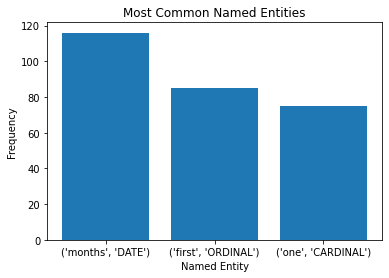

In [59]:
import matplotlib.pyplot as plt

# Extract the named entities and their frequencies from the counter
entities, frequencies = zip(*counter[:3])

# Convert the named entities to strings
entities = [str(e) for e in entities]

# Plot the named entities as a bar chart
plt.bar(entities, frequencies)
plt.xlabel('Named Entity')
plt.ylabel('Frequency')
plt.title('Most Common Named Entities')
plt.show()


### What are the common named entities in the answers ?

In [56]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [57]:
tags = []

for text in data['reply_text'].drop_duplicates():
  doc = nlp(text)
  tags.extend([(x.text, x.label_) for x in doc.ents])

Counter(tags)
counter = sorted(Counter(tags).items(), key=lambda x: x[1], reverse=True)

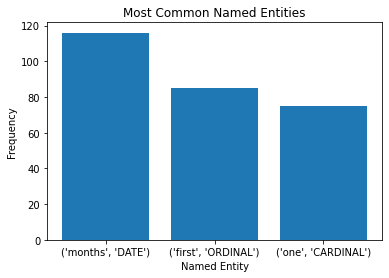

In [58]:
import matplotlib.pyplot as plt

# Extract the named entities and their frequencies from the counter
entities, frequencies = zip(*counter[:3])

# Convert the named entities to strings
entities = [str(e) for e in entities]

# Plot the named entities as a bar chart
plt.bar(entities, frequencies)
plt.xlabel('Named Entity')
plt.ylabel('Frequency')
plt.title('Most Common Named Entities')
plt.show()


### What are the common themes or topics in the questions?

In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')

def preprocess(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([c for c in text if c not in string.punctuation])
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [t for t in tokens if t not in stopwords]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return tokens

# Pre-process the "questions" column
questions = df['post_title']
question_tokens = [preprocess(q) for q in questions]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [62]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Create a dictionary from the question text
dictionary = Dictionary(question_tokens)

# Create a bag-of-words representation of the question text
bow_corpus = [dictionary.doc2bow(q) for q in question_tokens]

# Train the LDA model
lda = LdaModel(bow_corpus, num_topics=10, id2word=dictionary)

# Print the topics
for i, topic in lda.show_topics(formatted=True):
    print(f"Topic {i}: {topic}")


Topic 0: 0.370*"garden" + 0.370*"club" + 0.092*"may" + 0.070*"december" + 0.018*"april" + 0.014*"august" + 0.013*"november" + 0.012*"october" + 0.004*"march" + 0.003*"january"
Topic 1: 0.129*"penfed" + 0.044*"doe" + 0.044*"loan" + 0.039*"personal" + 0.036*"offer" + 0.034*"membership" + 0.032*"amex" + 0.032*"cu" + 0.028*"free" + 0.027*"checking"
Topic 2: 0.330*"garden" + 0.329*"club" + 0.073*"may" + 0.068*"august" + 0.067*"december" + 0.018*"april" + 0.014*"anyone" + 0.010*"november" + 0.009*"october" + 0.009*"march"
Topic 3: 0.178*"credit" + 0.125*"union" + 0.069*"membership" + 0.052*"nfcu" + 0.034*"approval" + 0.031*"ssl" + 0.028*"navy" + 0.022*"list" + 0.022*"benefi" + 0.022*"sri"
Topic 4: 0.261*"september" + 0.087*"bank" + 0.049*"card" + 0.029*"long" + 0.025*"yield" + 0.025*"high" + 0.018*"best" + 0.015*"discover" + 0.014*"credit" + 0.014*"debit"
Topic 5: 0.145*"account" + 0.068*"deposit" + 0.067*"saving" + 0.047*"checking" + 0.047*"well" + 0.047*"fargo" + 0.042*"usaa" + 0.036*"affi

In [64]:
%pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c0147d2f54f6d70272b82ea17998c3b3ed2f19affd120203a7912230d1fa2962
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=ee0a533cf99244e862f66991ccb51913d8685abaf4765361f537d3b3c0db55a3
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [65]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
vis = pyLDAvis.gensim_models.prepare(lda, bow_corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


### What are the common themes or topics in the answers ?

In [66]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

def preprocess(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([c for c in text if c not in string.punctuation])
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [t for t in tokens if t not in stopwords]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return tokens

# Pre-process the "questions" column
answers = df['reply_text']
answer_tokens = [preprocess(q) for q in questions]

In [67]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Create a dictionary from the question text
dictionary = Dictionary(answer_tokens)

# Create a bag-of-words representation of the question text
bow_corpus = [dictionary.doc2bow(q) for q in answer_tokens]

# Train the LDA model
lda = LdaModel(bow_corpus, num_topics=10, id2word=dictionary)

# Print the topics
for i, topic in lda.show_topics(formatted=True):
    print(f"Topic {i}: {topic}")


/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 0: 0.281*"september" + 0.081*"membership" + 0.035*"affinity" + 0.032*"approval" + 0.025*"payment" + 0.024*"cu" + 0.019*"account" + 0.019*"need" + 0.018*"card" + 0.018*"new"
Topic 1: 0.132*"federal" + 0.092*"navy" + 0.056*"january" + 0.052*"june" + 0.047*"july" + 0.045*"ssl" + 0.043*"garden" + 0.043*"club" + 0.029*"cloc" + 0.025*"approved"
Topic 2: 0.352*"club" + 0.352*"garden" + 0.091*"may" + 0.072*"december" + 0.043*"august" + 0.015*"april" + 0.011*"november" + 0.011*"october" + 0.008*"march" + 0.007*"yield"
Topic 3: 0.105*"saving" + 0.072*"deposit" + 0.057*"account" + 0.050*"fargo" + 0.050*"well" + 0.043*"usaa" + 0.034*"tell" + 0.029*"nonmilitary" + 0.028*"money" + 0.020*"checking"
Topic 4: 0.101*"fcu" + 0.061*"ploc" + 0.044*"dcu" + 0.039*"dp" + 0.039*"quorum" + 0.035*"penfed" + 0.019*"got" + 0.018*"strange" + 0.018*"email" + 0.017*"update"
Topic 5: 0.334*"garden" + 0.334*"club" + 0.070*"may" + 0.060*"december" + 0.058*"january" + 0.020*"june" + 0.020*"august" + 0.018*"april" +

In [68]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
vis = pyLDAvis.gensim_models.prepare(lda, bow_corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


### How many questions in the dataset?

In [69]:
unique_questions = df["post_title"].unique()
len(unique_questions)

475

### How many answers in the dataset?

In [70]:
unique_answers = df["reply_text"].unique()
len(unique_answers)

475

### What is the ratio of questions to answers in the dataset?

In [71]:
ratio = len(unique_questions) / len(unique_answers)
ratio

1.0

### Are the questions and answers balanced in the dataset ?

In [72]:
if ratio > 0.9 and ratio < 1.1:
    print("The questions and answers are balanced.")
else:
    print("The questions and answers are imbalanced.")

The questions and answers are balanced.


### Are the questions and answers diverse in the dataset?

In [73]:
num_unique_questions = df['post_title'].nunique()
num_total_questions = df['post_title'].count()
ratio_questions = num_unique_questions / num_total_questions

num_unique_answers = df['reply_text'].nunique()
num_total_answers = df['reply_text'].count()
ratio_answers = num_unique_answers / num_total_answers

print(f"The ratio of unique questions to total questions is: {ratio_questions:.2f}")
print(f"The ratio of unique answers to total answers is: {ratio_answers:.2f}")


The ratio of unique questions to total questions is: 0.05
The ratio of unique answers to total answers is: 0.05


### Are the questions and answers relevant to the topic of inflation and recession?

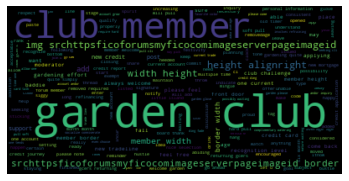

In [74]:
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate the "questions" and "answers" columns into a single text
text = df['post_title'].str.cat(df['post_text'], sep=' ').str.cat(df['reply_text'], sep=' ')

# Create the word cloud
wordcloud = WordCloud().generate(' '.join(text.to_list()))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Are the questions and answers written in clear and concise language?

In [76]:
%pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.1 MB/s eta 0:00:00


In [77]:
from textstat.textstat import textstat

# Calculate the Flesch Reading Ease scores for the questions and answers
questions_scores = df['post_title'].apply(textstat.flesch_reading_ease)
answers_scores = df['reply_text'].apply(textstat.flesch_reading_ease)

# Print the mean scores
print(f"The mean Flesch Reading Ease score for the questions is: {questions_scores.mean():.2f}")
print(f"The mean Flesch Reading Ease score for the answers is: {answers_scores.mean():.2f}")


The mean Flesch Reading Ease score for the questions is: 61.85
The mean Flesch Reading Ease score for the answers is: -743.23


### Are the questions and answers written in a consistent style and tone? 

In [78]:
from textblob import TextBlob

# Calculate the sentiment of the questions and answers
questions_sentiment = df['post_title'].apply(lambda x: TextBlob(x).sentiment.polarity)
answers_sentiment = df['reply_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print the mean sentiments
print(f"The mean sentiment of the questions is: {questions_sentiment.mean():.2f}")
print(f"The mean sentiment of the answers is: {answers_sentiment.mean():.2f}")


The mean sentiment of the questions is: 0.01
The mean sentiment of the answers is: 0.13


### Are the answers provided for all the questions in the dataset?

In [79]:
df['has_answer'] = df['reply_text'].apply(lambda x: 1 if x else 0)

In [80]:
counts = df.groupby('post_title')['has_answer'].sum()

In [81]:
# Count the number of questions that have answers
num_questions_with_answers = counts[counts > 0].count()

In [82]:
percentage = num_questions_with_answers / df['post_title'].count() * 100

In [83]:
percentage

4.9289197883158655

### Are the answers provided for none of the questions in the dataset?

In [84]:
df['has_answer'] = df['reply_text'].apply(lambda x: 1 if x else 0)

In [85]:
counts = df.groupby('post_title')['has_answer'].sum()

In [86]:
num_questions_with_answers = counts[counts > 0].count()

In [87]:
if num_questions_with_answers == 0:
    print("None of the questions have corresponding answers.")
else:
    print("Some of the questions have corresponding answers.")

Some of the questions have corresponding answers.
